In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns #library for visualization

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
full_data = pd.read_csv("/kaggle/input/titanic/train.csv") #Load training data
full_data.head() 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
prediction_data = pd.read_csv("/kaggle/input/titanic/test.csv")  #Load test data -> Survived column is missing because is what I have to predict
prediction_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

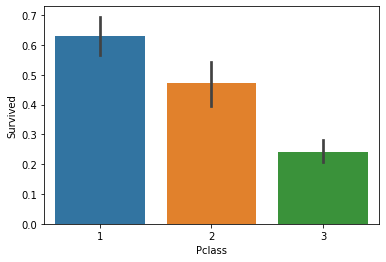

In [5]:
#Data analisis with visualization

sns.barplot(x=full_data['Pclass'], y=full_data['Survived'])

Graph shows marked relationship between Pclass and survival rate: Higher class, more chances to survive --> Good feature for model

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

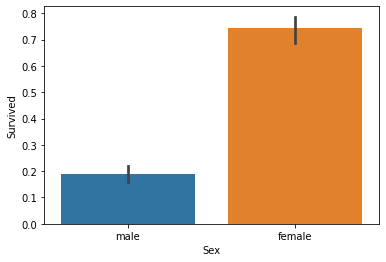

In [6]:
sns.barplot(x=full_data['Sex'], y=full_data['Survived'])

Graph shows marked relationship between Pclass and survival rate: females have more chances to survive --> Good feature for model

<AxesSubplot:xlabel='Age', ylabel='Count'>

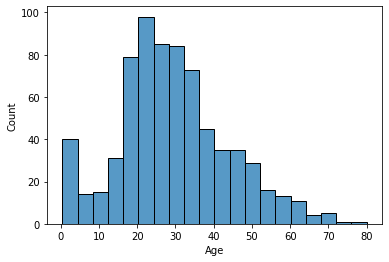

In [7]:
sns.histplot(data=full_data, x='Age')

<AxesSubplot:xlabel='Age', ylabel='Count'>

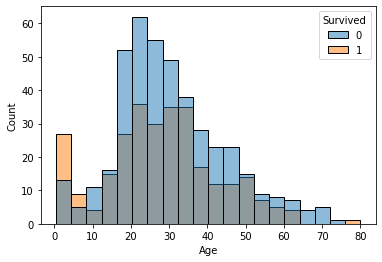

In [8]:
sns.histplot(data=full_data, x='Age', hue='Survived')

Graph shows distribution of age for survived and not-survived group. Survived group has more counts for children than not-survived. -->Good feature for model

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

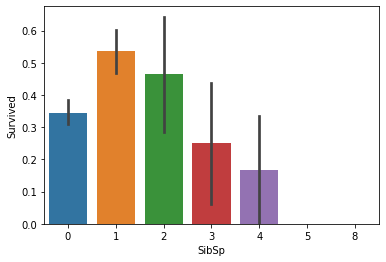

In [9]:
sns.barplot(x=full_data['SibSp'], y=full_data['Survived'])


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

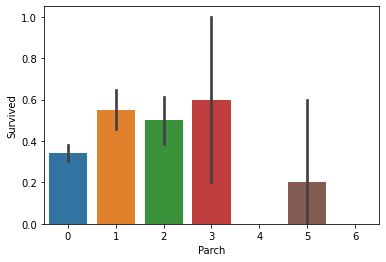

In [10]:
sns.barplot(x=full_data['Parch'], y=full_data['Survived'])

Because SibSp and Parch are highly correlated, it'd be better to merge them on a single feature: SoloTravel

In [11]:
full_data['SoloTravel'] = np.where((full_data['SibSp'] + full_data['Parch'])>0,0,1) #numpy.where(condition, [x, y, ]/)
prediction_data['SoloTravel'] = np.where((prediction_data['SibSp'] + prediction_data['Parch'])>0,0,1)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 46.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

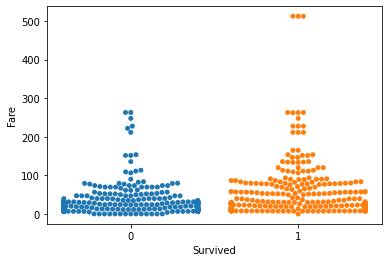

In [12]:
sns.swarmplot(x=full_data['Survived'], y=full_data['Fare'])

There isn't evident relationship between fare and survived --> Feature not good for model 

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

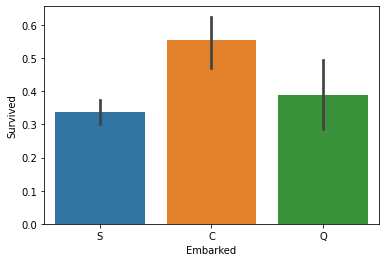

In [13]:
sns.barplot(x=full_data['Embarked'], y=full_data['Survived'])

Relationship between survival and port of embarcation is similar between the 3 of them --> Feature not good for model.

In [14]:
from sklearn.ensemble import RandomForestClassifier  #sklearn.ensemble is a module which contains the class RandomForestClassifier is
from sklearn.impute import SimpleImputer

y = full_data["Survived"]

features = ["Pclass", "Sex", "Age", "SoloTravel"]
X_missing_values = pd.get_dummies(full_data[features])  #converts categorical variable into dummy: Ex for Sex: 2 columns -> Sex_male \ Sex_female using 1 or 0 to fill them
X_prediction_missing_values = pd.get_dummies(prediction_data[features])


In [15]:
my_imputer = SimpleImputer(strategy = 'median')   #Age has missing values --> Try SimpleImputer(). Error if one of the variables are categorical -> first get_dummy and then missing values.
X = pd.DataFrame(my_imputer.fit_transform(X_missing_values))
X_prediction = pd.DataFrame(my_imputer.transform(X_prediction_missing_values))

X.columns = X_missing_values.columns   #Imputation removes columns' names; put them back
X_prediction.columns = X_prediction_missing_values.columns

In [16]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0)

In [17]:
from sklearn.metrics import mean_absolute_error

def my_mae(n_estimators, max_depth, train_X, test_X, train_y, test_y):
    model_tuning = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
    model_tuning.fit(train_X, train_y)
    predictions_tuning = model_tuning.predict(test_X)
    MAE = mean_absolute_error(test_y, predictions_tuning)
    return(MAE)

In [18]:
#model tuning: n_estimators
for n in [2,5,10,20,30,50,100,200,250, 300, 350]:
    mae = my_mae(n,5,train_X, test_X, train_y, test_y)
    print(n, mae)

2 0.21524663677130046
5 0.2062780269058296
10 0.19282511210762332
20 0.2062780269058296
30 0.19282511210762332
50 0.18834080717488788
100 0.17937219730941703
200 0.18385650224215247
250 0.17937219730941703
300 0.18385650224215247
350 0.18834080717488788


In [19]:
#model tuning: max_depth
for depth in [1,2,3,4,5,6, 7,8,9,10]:
    mae = my_mae(100,depth,train_X, test_X, train_y, test_y)
    print(depth, mae)

1 0.21973094170403587
2 0.21973094170403587
3 0.18385650224215247
4 0.19282511210762332
5 0.17937219730941703
6 0.17937219730941703
7 0.18834080717488788
8 0.17040358744394618
9 0.18834080717488788
10 0.19730941704035873


In [20]:
model= RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
model.fit(X, y)
predictions = model.predict(X_prediction)

In [21]:
output = pd.DataFrame({'PassengerId': prediction_data.PassengerId, 'Survived': predictions})  #stores output in dictionary
output.to_csv('submission.csv', index=False)
print("Your submission was succesfully saved!")

Your submission was succesfully saved!
